## Looking at how fast the sudoku solver works


In [5]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np

df = pd.read_csv('sudoku_tst_scores.csv')
df.head()

,date,sudoku,time,difficulty,alg2,version
0,2022-07-30 00:33:22.214405,"""003020600900305001001806400008102900700000008...",0.00232,1,False,v2.11
1,2022-07-30 00:33:22.217619,"""003020600900305001001806400008102900700000008...",0.00216,1,True,v2.11
2,2022-07-30 00:33:22.219949,"""005306078200407005000009106008002034040030010...",0.00167,1,False,v2.11
3,2022-07-30 00:33:22.222150,"""005306078200407005000009106008002034040030010...",0.00155,1,True,v2.11
4,2022-07-30 00:33:22.233287,"""069800500000000103400000020000170000080006000...",0.01052,7,False,v2.11


In [14]:
df_tw = (df
         .assign(sudoku=lambda df_: df_.sudoku.apply(lambda x: x[1:7]),
                 time=df.time * 1000,
                 date=pd.to_datetime(df.date)
            )
        )
df_tw.head()

,date,sudoku,time,difficulty,alg2,version
0,2022-07-30 00:33:22.214405,003020,2.32,1,False,v2.11
1,2022-07-30 00:33:22.217619,003020,2.16,1,True,v2.11
2,2022-07-30 00:33:22.219949,005306,1.67,1,False,v2.11
3,2022-07-30 00:33:22.222150,005306,1.55,1,True,v2.11
4,2022-07-30 00:33:22.233287,069800,10.52,7,False,v2.11


In [13]:
df_pl = df_tw.groupby(by=['sudoku', 'alg2']).mean().reset_index()
df_pl.head()


,sudoku,alg2,time,difficulty
0,000000,False,12545.650,10781.0
1,000000,True,6.320,1.0
2,003020,False,2.960,1.0
3,003020,True,2.985,1.0
4,005300,False,190.020,134.5


<AxesSubplot:xlabel='sudoku', ylabel='time'>

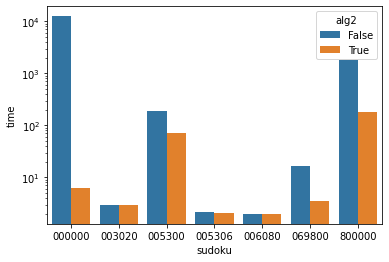

In [16]:
sns.barplot(data=df_pl, x='sudoku', y='time', hue='alg2', log=True)

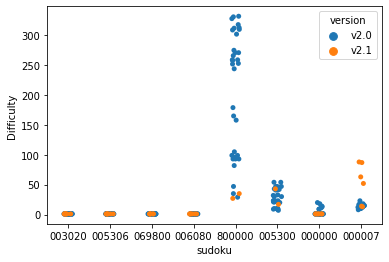

In [7]:
#g = sns.stripplot(data=df_tw[df_tw['Alg2?']==False], x='sudoku', y='Difficulty', hue='Alg2?')
df_tw = df_tw.rename(columns={'Alg2?': 'alg2'})
g = sns.stripplot(data=df_tw.query('alg2==True'), x='sudoku', y='Difficulty', hue='version')